# Spark foundation Task 1

### Intern-Ankit Kumar Gupta



### Batch-March 2022

## This is the project of Predict the percentge of student based on the no. of study hours.

### Find the predict score if student studies 9.25 hr per day

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data set for train and test

In [2]:
df = pd.read_csv(r"D:\DATA SCIENTIST\DATA SET\student_scores - student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

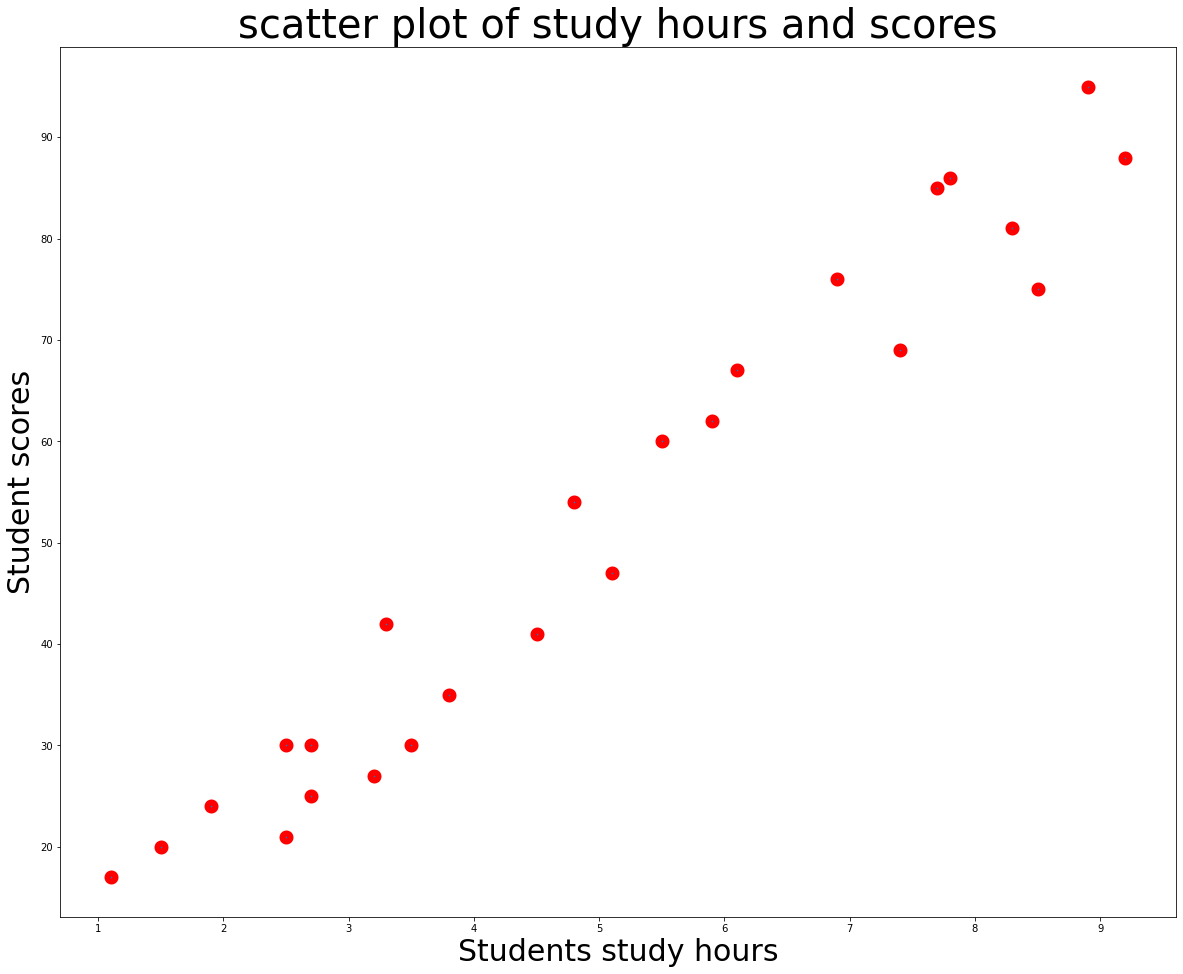

In [10]:
plt.figure(figsize=(20,16))
plt.scatter(x=df.Hours,y=df.Scores,linewidths=8,edgecolors="r")
plt.xlabel("Students study hours",fontsize=30)
plt.ylabel("Student scores",fontsize=30)
plt.title("scatter plot of study hours and scores",fontsize=40)
plt.show()

# Preprocessing

In [11]:
df.isnull().sum().sum()

0

## Split Data set into trained and Test Data

In [12]:
X = df.drop("Scores",axis="columns")
y = df.drop("Hours",axis="columns")
print("shape of X=",X.shape)
print("shape of y=",y.shape)

shape of X= (25, 1)
shape of y= (25, 1)


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [15]:
print("shape of X_train=",X_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of X_test=",X_test.shape)
print("shape of y_test=",y_test.shape)

shape of X_train= (20, 1)
shape of y_train= (20, 1)
shape of X_test= (5, 1)
shape of y_test= (5, 1)


## Using simple linear Regression 

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr =  LinearRegression()
lr.fit(X_train,y_train)



LinearRegression()

In [18]:
lr.coef_

array([[9.9434127]])

In [19]:
lr.intercept_

array([0.50330792])

## Predicted score if student studies for 9.25hr

## y=m*X+c

In [25]:
m=9.943
c=0.503
y=m*9.25+c
y

92.47574999999999

In [26]:
lr.predict([[9.25]])[0][0].round(2)

92.48

In [27]:
y_pred=lr.predict(X_test)
y_pred

array([[25.36183967],
       [27.35052222],
       [33.31656984],
       [77.06758572],
       [19.39579205]])

In [28]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["hours","original_scores","predicted_scores"])

,hours,original_scores,predicted_scores
0,2.5,30.0,25.361840
1,2.7,30.0,27.350522
2,3.3,42.0,33.316570
3,7.7,85.0,77.067586
4,1.9,24.0,19.395792


In [29]:
lr.score(X_test,y_test)

0.9235792627359555

## Using Ridge and Lasso

In [30]:
from sklearn.linear_model import Ridge,Lasso

In [50]:
rd=Ridge(alpha=4)
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.9313519363401369

In [61]:
ls =Lasso(alpha=2)
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

0.9315943967896319

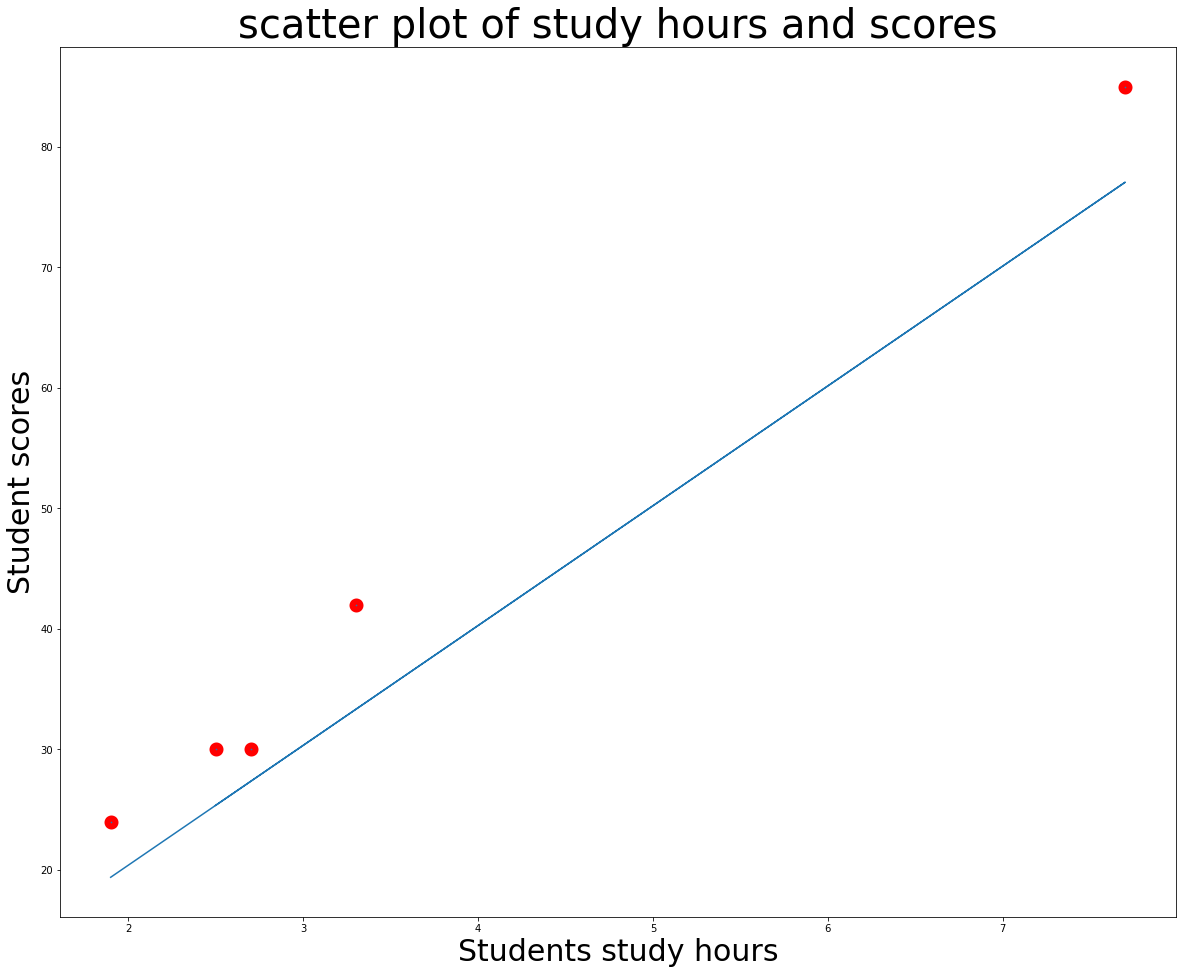

In [83]:
plt.figure(figsize=(20,16))
plt.scatter(X_test,y_test,linewidths=8,edgecolors="r")
plt.plot(X_test,y_pred)
plt.xlabel("Students study hours",fontsize=30)
plt.ylabel("Student scores",fontsize=30)
plt.title("scatter plot of study hours and scores",fontsize=40)
plt.show()

## Predicted score if student studies for 9.25hr

In [62]:
ls.coef_

array([9.60758303])

In [66]:
ls.intercept_

array([2.30335494])

In [72]:
ls.predict([[9.25]])[0].round(2)

91.17

In [73]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["hours","original_scores","predicted_scores"])

,hours,original_scores,predicted_scores
0,2.5,30.0,25.361840
1,2.7,30.0,27.350522
2,3.3,42.0,33.316570
3,7.7,85.0,77.067586
4,1.9,24.0,19.395792


In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE=",mse)
print("RMSE=",rmse)

MSE= 37.61123005187214
RMSE= 6.132799528100698


In [79]:
from sklearn import metrics

In [80]:
print('mean absolute error=',metrics.mean_absolute_error(y_test,y_pred))

mean absolute error= 5.701538099875757


# Conclusion

### I got 92% accuracy using linearRegression model


### and 93% accuracy by using Ridge and Lasso

## and if student studies 9.25 hr/day then he will score arround 91.17%

# Thank you!